<a href="https://colab.research.google.com/github/arun4589/ML/blob/main/Gender_age_ethnicity(functional_api).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arun4545","key":"d7f43d352032462a540c4afd72d63bff"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d nipunarora8/age-gender-and-ethnicity-face-data-csv


Dataset URL: https://www.kaggle.com/datasets/nipunarora8/age-gender-and-ethnicity-face-data-csv
License(s): copyright-authors
 82% 52.0M/63.2M [00:00<00:00, 165MB/s]
100% 63.2M/63.2M [00:00<00:00, 124MB/s]


In [4]:
!unzip age-gender-and-ethnicity-face-data-csv.zip

Archive:  age-gender-and-ethnicity-face-data-csv.zip
  inflating: age_gender.csv          


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
df=pd.read_csv('age_gender.csv')

In [61]:
df.shape


(23705, 5)

In [62]:
df.sample(3)

,age,ethnicity,gender,img_name,pixels
19326,54,3,0,20170119210221456.jpg.chip.jpg,67 71 62 65 61 68 103 54 52 58 62 72 88 100 11...
11396,30,0,1,20170117181545532.jpg.chip.jpg,242 229 219 217 240 207 181 187 167 79 85 122 ...
19487,55,0,0,20170117201004124.jpg.chip.jpg,151 156 159 156 150 140 129 126 126 127 127 12...


In [63]:
df.isnull().sum()

,0
age,0
ethnicity,0
gender,0
img_name,0
pixels,0


In [64]:
df.duplicated().sum()

0

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [66]:
df['gender'].value_counts()

,count
gender,
0,12391
1,11314


In [67]:
df.ethnicity.value_counts()

,count
ethnicity,
0,10078
1,4526
3,3975
2,3434
4,1692


In [17]:

array = np.fromstring((df['pixels'][100]), sep=" ")

In [18]:
img=array.reshape(48,48,1)

In [15]:
import cv2
from google.colab.patches import cv2_imshow

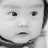

In [19]:
cv2_imshow(img)

In [98]:
df['pixels']=df['pixels'].apply(lambda x: np.fromstring(x, sep=" "))

In [69]:
df.sample(3)

,age,ethnicity,gender,img_name,pixels
17199,45,3,0,20170119201303715.jpg.chip.jpg,"[35.0, 35.0, 31.0, 31.0, 38.0, 62.0, 79.0, 90...."
18871,53,0,0,20170120223117140.jpg.chip.jpg,"[182.0, 118.0, 132.0, 124.0, 122.0, 130.0, 130..."
12742,34,3,0,20170119151259742.jpg.chip.jpg,"[148.0, 150.0, 151.0, 155.0, 155.0, 152.0, 136..."


In [99]:
df['pixels']=df['pixels'].apply(lambda x: x.reshape(48,48,1))


In [71]:
print(df['pixels'].iloc[0].shape)

(48, 48, 1)


In [100]:
df['pixels'] = df['pixels'].apply(lambda x: x / 255.0)

In [101]:
x = np.stack(df['pixels'].values)
y_age = df['age'].values
y_gender = df['gender'].values
y_ethnicity = df['ethnicity'].values

In [102]:
y_ethnicity

array([2, 2, 2, ..., 2, 2, 0])

In [103]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
y_ethnicity=ohe.fit_transform(df[['ethnicity']]).toarray()

In [104]:
y_ethnicity

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [105]:
x.shape,y_age.shape,y_gender.shape,y_ethnicity.shape

((23705, 48, 48, 1), (23705,), (23705,), (23705, 5))

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train, x_test, y_train_age, y_test_age, y_train_gender, y_test_gender, y_train_ethnicity, y_test_ethnicity = train_test_split(
    x, y_age, y_gender, y_ethnicity, test_size=0.2, random_state=42
)

In [108]:
x_train.shape, x_test.shape, y_train_age.shape, y_test_age.shape, y_train_gender.shape, y_test_gender.shape, y_train_ethnicity.shape, y_test_ethnicity.shape

((18964, 48, 48, 1),
 (4741, 48, 48, 1),
 (18964,),
 (4741,),
 (18964,),
 (4741,),
 (18964, 5),
 (4741, 5))

In [81]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

In [109]:
inputs = Input(shape=(48,48,1))


x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(32, activation='relu')(x)

In [110]:
age_output = Dense(1, activation='linear', name='age')(x)

In [111]:
gender_output = Dense(1, activation='sigmoid', name='gender')(x)

In [112]:
ethnicity_output = Dense(5, activation='softmax', name='ethnicity')(x)

In [113]:
outputs = [age_output, gender_output, ethnicity_output]

# Create the model with the list of outputs
model = Model(inputs=inputs, outputs=outputs)

In [114]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss={
        'age': 'mse',
        'gender': 'binary_crossentropy',
        'ethnicity': 'categorical_crossentropy',
    },
    metrics={
        'age': 'mae',
        'gender': 'accuracy',
        'ethnicity': 'accuracy',
    }
)

In [115]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 48, 48, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 48, 48, 32)     │            320 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 24, 24, 32)     │              0 │ conv2d_6[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 24, 24, 64)     │         18,496 │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 12, 12, 64)     │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 12, 12, 128)    │         73,856 │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 6, 6, 128)      │              0 │ conv2d_8[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 4608)           │              0 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 128)            │        589,952 │ flatten_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 128)            │              0 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 64)             │          8,256 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 64)             │              0 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 32)             │          2,080 │ dropout_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ age (Dense)               │ (None, 1)              │             33 │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gender (Dense)            │ (None, 1)              │             33 │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ ethnicity (Dense)         │ (None, 5)              │            165 │ dense_9[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 693,191 (2.64 MB)

 Trainable params: 693,191 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

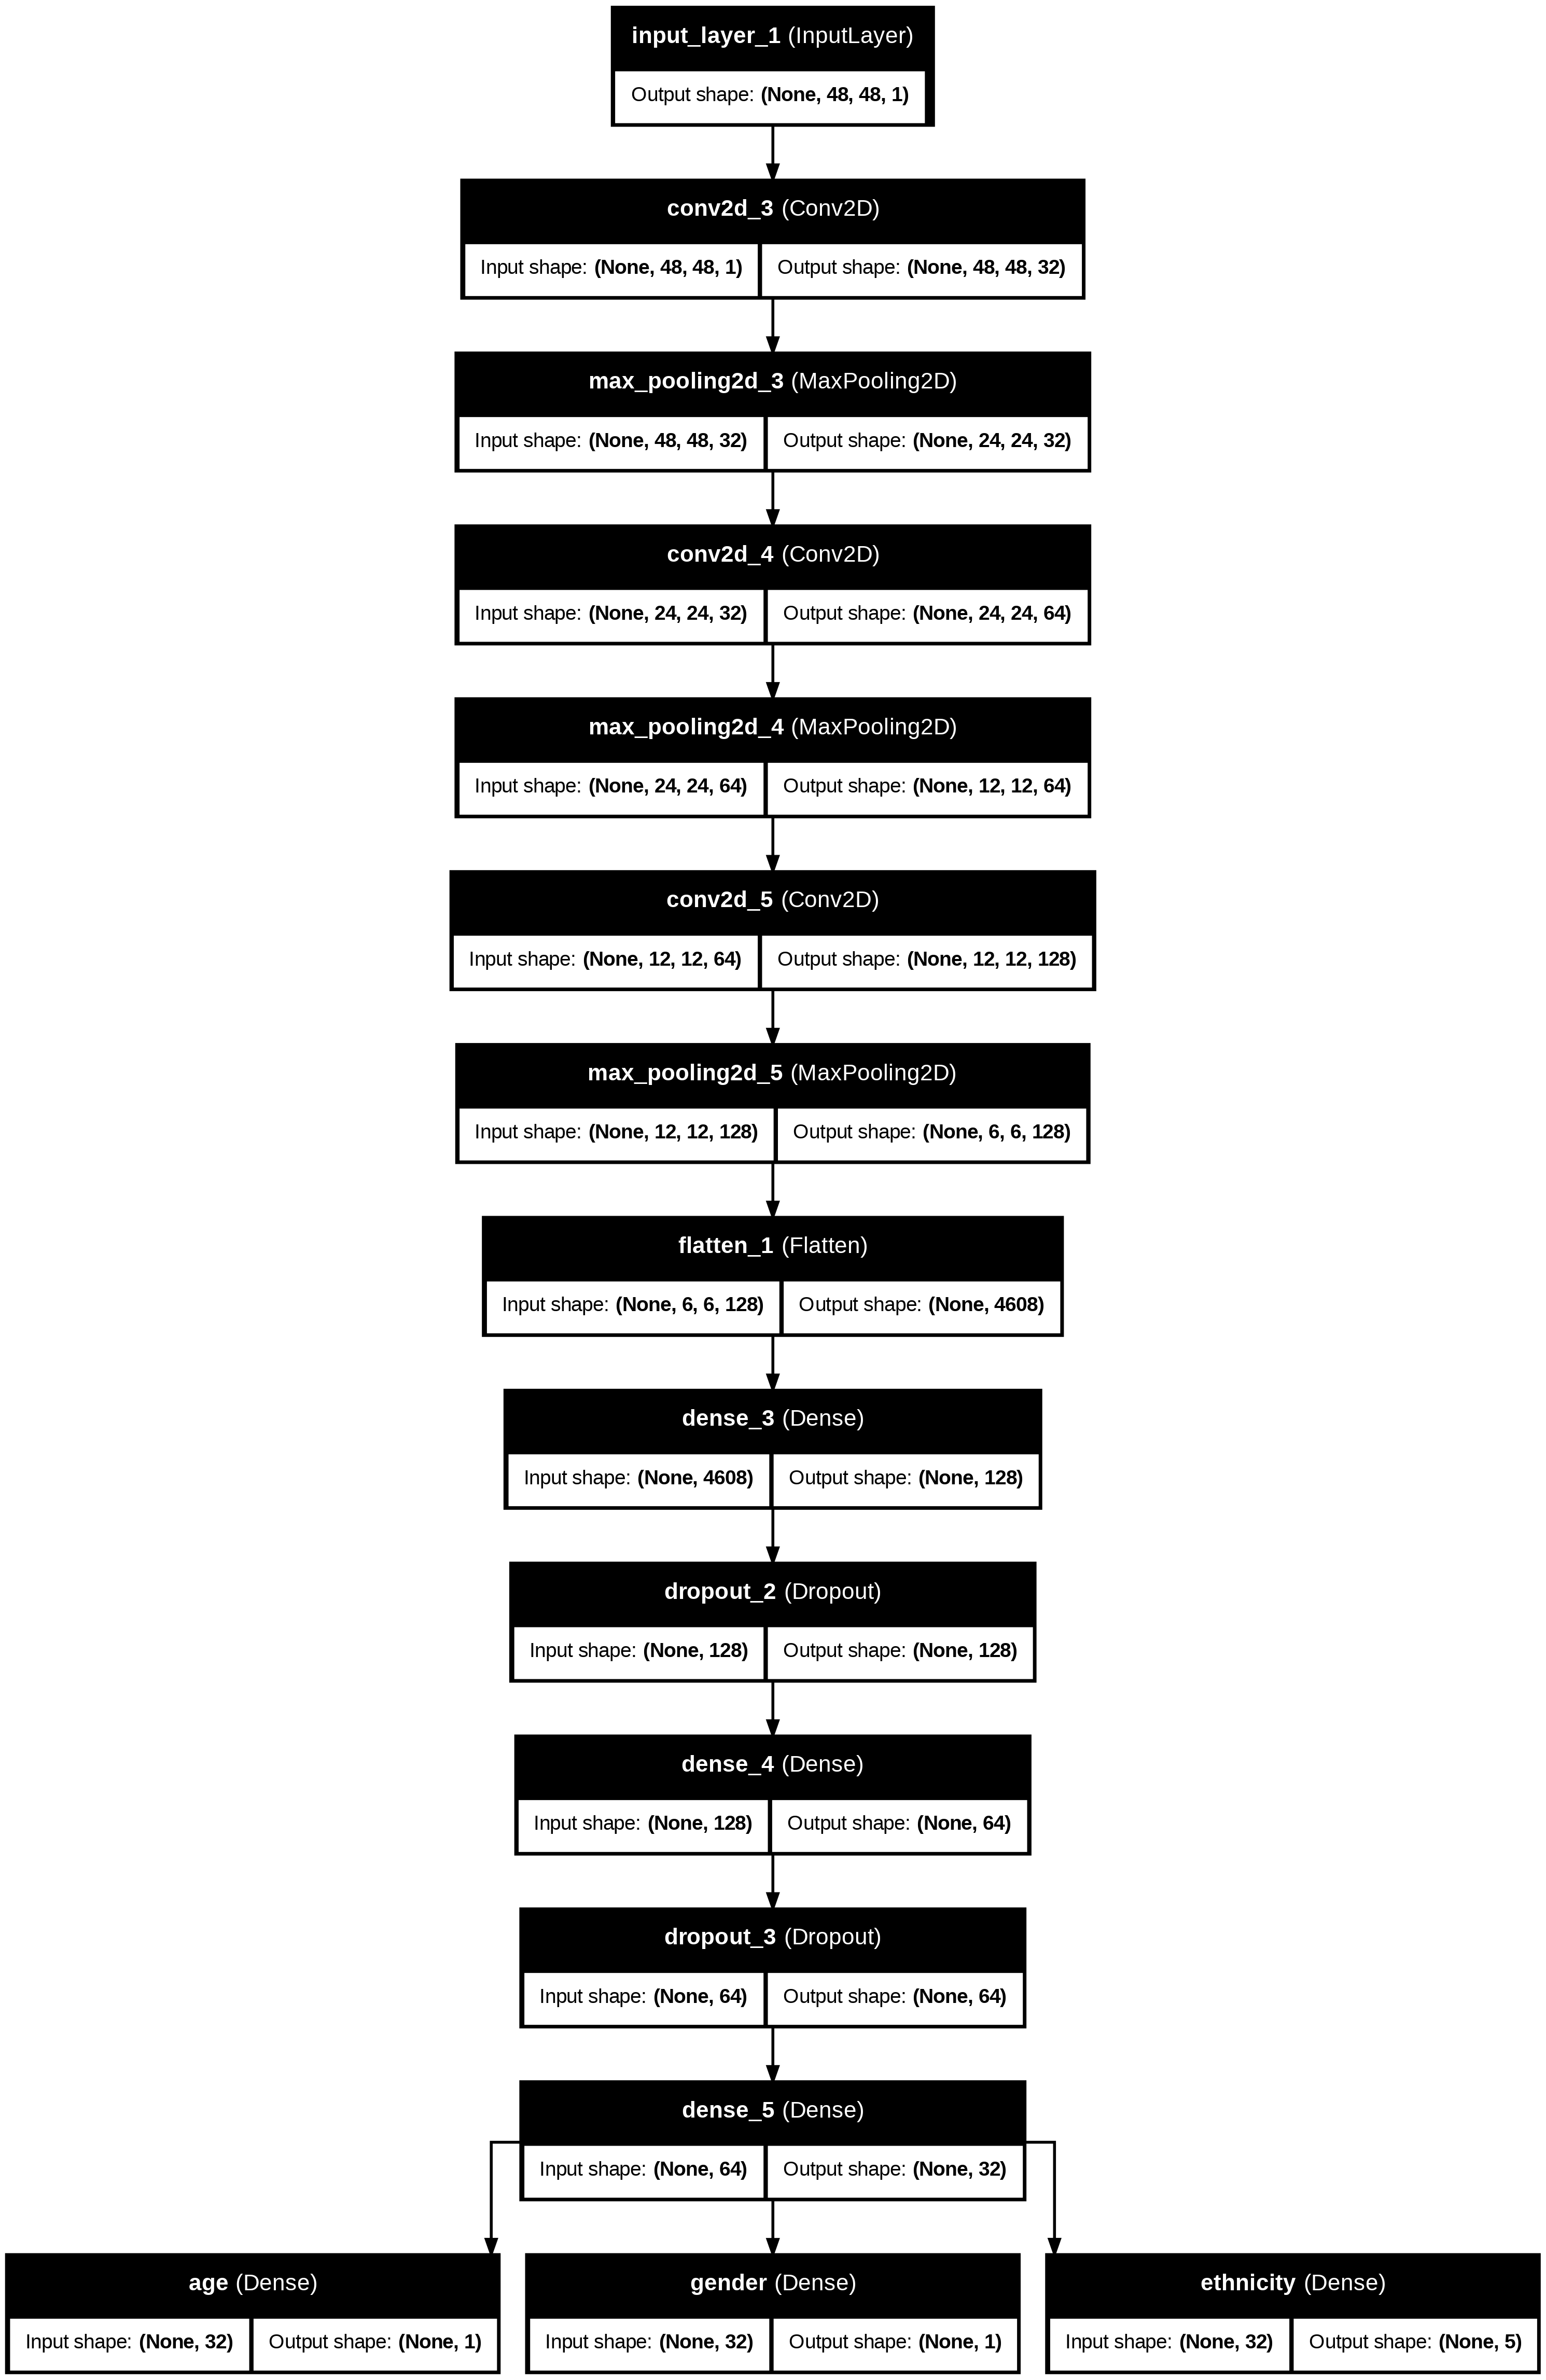

In [89]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [117]:
history = model.fit(
    x_train,  # Images
    {
        'age': y_train_age,
        'gender': y_train_gender,
        'ethnicity': y_train_ethnicity,
    },
    validation_data=(
        x_test,
        {
            'age': y_test_age,
            'gender': y_test_gender,
            'ethnicity': y_test_ethnicity,
        },
    ),
    epochs=25,  # Number of epochs
    batch_size=32,  # Batch size
    verbose=1,



)

Epoch 1/25


AttributeError: 'NoneType' object has no attribute 'items'

In [43]:
print(y_train_ethnicity.shape)

(18964, 5)
